# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [20]:
!pip install palmerpenguins


In [21]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sys import exit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [22]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [23]:
# Drop NaN vlaues
penguins = penguins.dropna()

# Identify categorical columns
categorical_cols = ['species', 'island', 'sex']

# ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply transformation to create dummy variables
penguins_encoded = ct.fit_transform(penguins)

# Transformed data back to a DataFrame
feature_names = list(ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)) + list(penguins.select_dtypes(include=np.number).columns)
penguins_encoded = pd.DataFrame(penguins_encoded, columns=feature_names)
penguins_encoded

# remove sex_female for redundancy
col_to_remove_index = penguins_encoded.columns.get_loc('sex_female')
penguins_encoded = penguins_encoded.drop(penguins_encoded.columns[col_to_remove_index], axis=1)
penguins_encoded

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,39.1,18.7,181.0,3750.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,39.5,17.4,186.0,3800.0,2007.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.3,18.0,195.0,3250.0,2007.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36.7,19.3,193.0,3450.0,2007.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,39.3,20.6,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,0.0,1.0,0.0,1.0,55.8,19.8,207.0,4000.0,2009.0
329,0.0,1.0,0.0,0.0,1.0,0.0,0.0,43.5,18.1,202.0,3400.0,2009.0
330,0.0,1.0,0.0,0.0,1.0,0.0,1.0,49.6,18.2,193.0,3775.0,2009.0
331,0.0,1.0,0.0,0.0,1.0,0.0,1.0,50.8,19.0,210.0,4100.0,2009.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

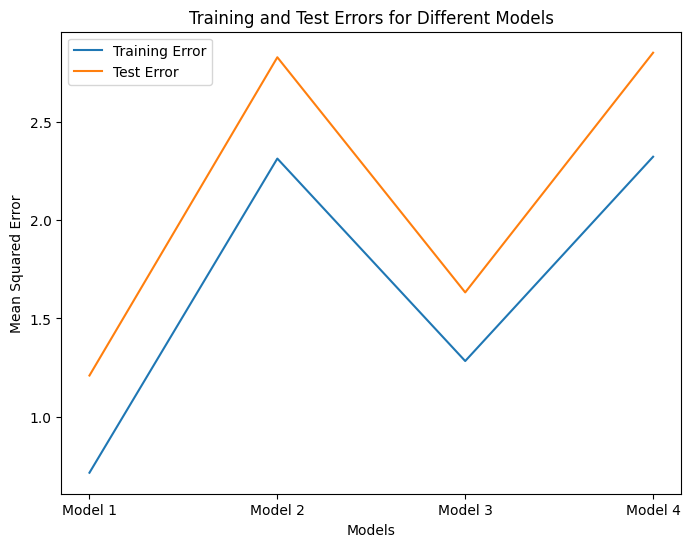

The best model is Model 1 with a test error of 1.21


In [24]:


from sklearn.model_selection import train_test_split

y = penguins_encoded['bill_depth_mm']

# Four different sets of predictor variables
X1 = penguins_encoded[['bill_length_mm', 'flipper_length_mm', 'species_Adelie', 'species_Gentoo']]
X2 = penguins_encoded[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3 = penguins_encoded[['bill_length_mm', 'flipper_length_mm', 'island_Dream', 'sex_male']]
X4 = penguins_encoded[['bill_length_mm', 'flipper_length_mm', ]]

# List of X variables and model names
X_list = [X1, X2, X3, X4]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Lists to store training and test errors
train_errors = []
test_errors = []

# Loop through each model
for X in X_list:
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Linear Regression Model
  model = LinearRegression()

  # Fit model to train data
  model.fit(X_train, y_train)

  # Predictions on the training and testing data
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calculate the mean squared error for the training and testing data
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)

  # Append the errors to the lists
  train_errors.append(train_error)
  test_errors.append(test_error)

# plot of the training and test errors
plt.figure(figsize=(8, 6))
plt.plot(model_names, train_errors, label='Training Error')
plt.plot(model_names, test_errors, label='Test Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Different Models')
plt.legend()
plt.show()

# Best Model dependent on test error
best_model_index = np.argmin(test_errors)
print(f"The best model is {model_names[best_model_index]} with a test error of {test_errors[best_model_index]:.2f}")

In [25]:
test_errors

[1.2091440035835772, 2.8296492087581355, 1.6323268622435247, 2.852803311940489]